# PCA(Principal Component Analysis) - 주 성분 분석

시각화를 위해 주로 사용함. 인식하기 쉬운 1,2차원의 개념을 넘어서 다차원의 특성을
시각화해줍니다.

In [13]:
from IPython.display import Image
import pandas as pd

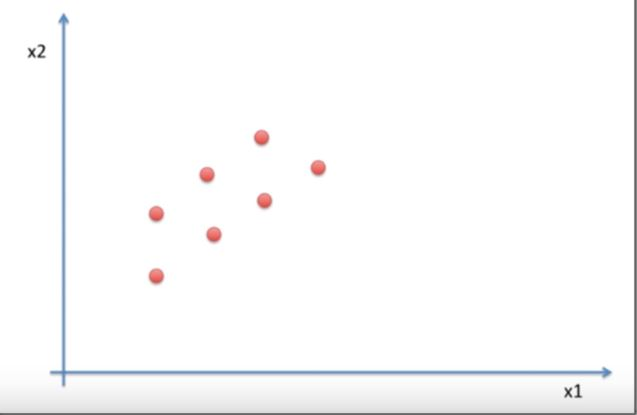

In [4]:
Image("2차원.jpg")

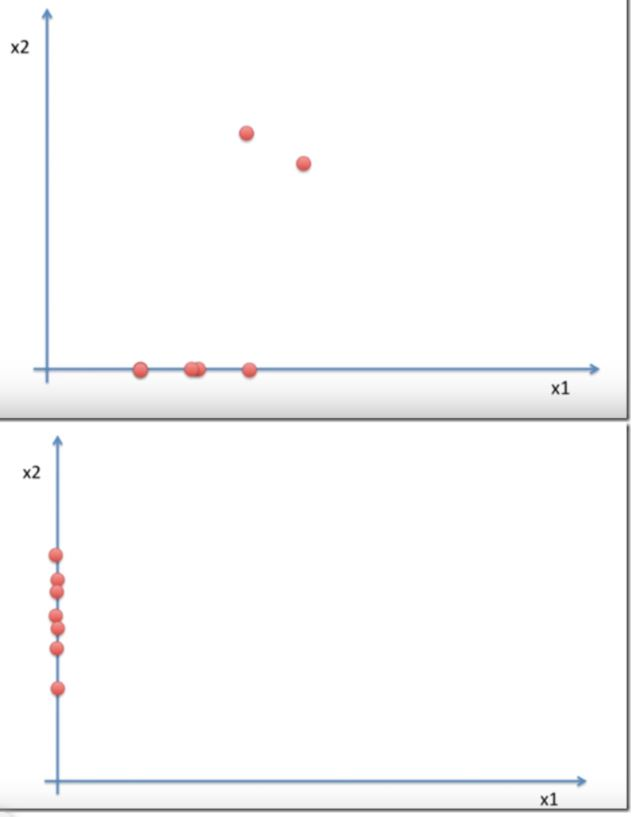

In [5]:
Image("1차원.jpg")

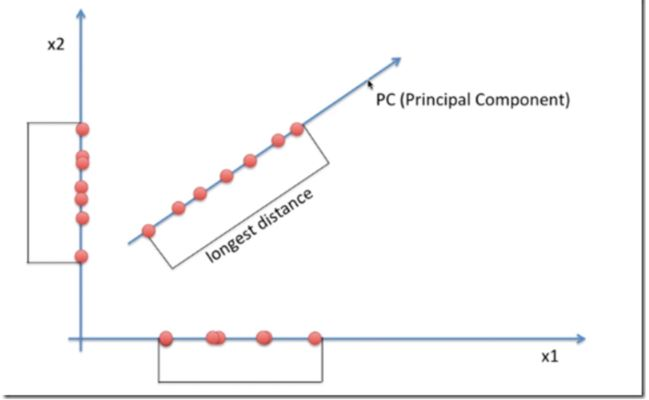

In [9]:
Image("PCA알고리즘.jpg")

분산이 가장 넓은 지역 = PC(Princal Component) 라고 한다.

각 점들이 겹치지 않도록 하는 선분을 의미.

수학적으로 PC를 구하는 방법은 고유벡터를 이용하는것이다.

고유벡터는 n차원당 n개가 존재한다.

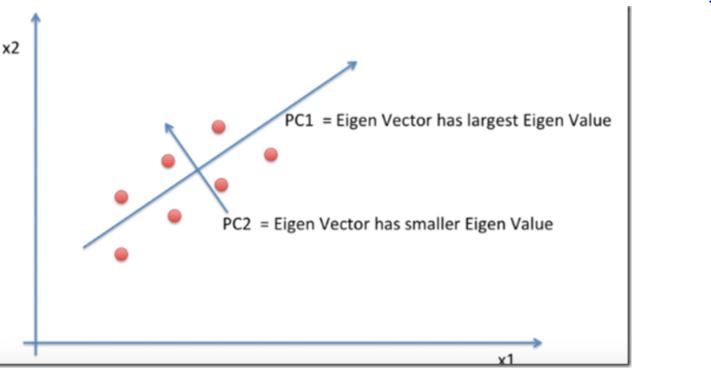

In [10]:
Image("Eigen Vector.JPG")

고유벡터가 n개일때에는, 그 중에서 가장 넓게 퍼지게 만드는 고유벡터를 찾아야 하고.

결론적으로 가장 분산이 큰 Eigen Value 가 가장 높은 값을 찾아야 한다.

In [14]:
df = pd.DataFrame(columns = ['calory', 'breakfast', 'lunch', 'dinner', 
                             'exercise', 'body_shape'])

In [15]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [16]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [19]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 
                             'exercise', ]]

X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [20]:
Y = df[['body_shape']]

Y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


calory 수치가 매우 높기때문에, 전체 데이터를 재설정한다.

In [25]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [26]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [27]:
import numpy as np

In [28]:
features = x_std.T # 각 특성들을 열이 아닌 행방향으로 변환.

In [29]:
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


고유벡터 구하기

In [30]:
eig_vals,eig_vecs = np.linalg.eig(covariance_matrix)

In [31]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [32]:
eig_vecs

array([[ 0.508005  ,  0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [ 0.44660335,  0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [ 0.38377913, -0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [ 0.42845209,  0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [-0.46002038,  0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [35]:
Max = 0

for i in range(0,len(eig_vals)) :
    if(Max < eig_vals[i]) :
        Max = eig_vals[i]

print(Max)

4.065734295237527


In [36]:
Max / sum(eig_vals)

0.7318321731427544

eig_vecs 는 총 5개였는데 1차원으로 차원을 축소시키며 73% 정보유실이 없는 채로 축소됨.

컬럼방향별 feature 데이터를 projection 시킨다.

여기서 projection이란 고유벡터 직선 위에 모든 데이터를 올려놓겠다는 것.

In [40]:
projected_X = x_std.dot(eig_vecs.T[0])

In [41]:
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [43]:
result = pd.DataFrame(projected_X , columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [44]:
result

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


# 데이터 시각화

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(<seaborn.axisgrid.FacetGrid at 0x5836862e88>, Text(0.5, 1, 'PCA result'))

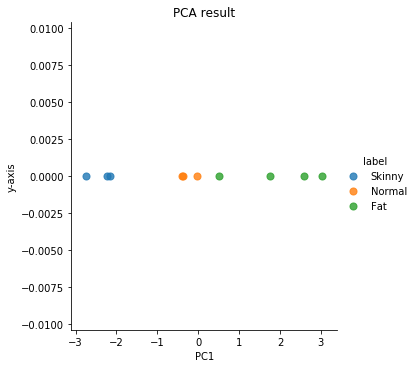

In [52]:
sns.lmplot('PC1', 'y-axis', data = result , fit_reg = False,
          scatter_kws = {"s": 50},hue = "label"), plt.title('PCA result')